In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import transforms, datasets, models
from torch.utils.data.sampler import SubsetRandomSampler
from torch.autograd import Variable


import os
print(os.listdir("D:/Anil/Anil_ML/IRISH/Rotated/data_processed"))

In [1]:
# Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomVerticalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

# test_transforms = transforms.Compose([transforms.Resize(256),
#                                       transforms.CenterCrop(224),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize([0.485, 0.456, 0.406], 
#                                                            [0.229, 0.224, 0.225])])

# validation_transforms = transforms.Compose([transforms.Resize(256),
#                                             transforms.CenterCrop(224),
#                                             transforms.ToTensor(),
#                                             transforms.Normalize([0.485, 0.456, 0.406], 
#                                                                  [0.229, 0.224, 0.225])])

NameError: name 'transforms' is not defined

In [ ]:
img_dir='D:/Anil/Anil_ML/IRISH/Rotated/data_processed'
train_data = datasets.ImageFolder(img_dir,transform=train_transforms)

In [ ]:
classes=train_data.classes

In [5]:
print(classes)

['processed_AK', 'processed_BCC', 'processed_IC', 'processed_Melanoma', 'processed_SCC']


In [6]:
# number of subprocesses to use for data loading
num_workers = 0
# percentage of training set to use as validation
valid_size = 0.2

test_size = 0.1

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor((valid_size+test_size) * num_train))
valid_idx, test_idx, train_idx = indices[:valid_split], indices[valid_split:test_split], indices[test_split:]

print(len(valid_idx), len(test_idx), len(train_idx))

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=10, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(train_data, batch_size=10, 
    sampler=test_sampler, num_workers=num_workers)

3594 1798 12582


In [7]:
#Now using the AlexNet
AlexNet_model = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Model description
AlexNet_model.eval()


Using cache found in C:\Users\Photoshop-Pc/.cache\torch\hub\pytorch_vision_v0.6.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
#Updating the second classifier
AlexNet_model.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 5 output nodes if we are going to get 10 class labels through our model.
AlexNet_model.classifier[6] = nn.Linear(1024,5)

In [9]:
AlexNet_model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [10]:
use_cuda = torch.cuda.is_available()
print(use_cuda)
if use_cuda:
    model = AlexNet_model.cuda()
criterion = nn.CrossEntropyLoss()
# m = nn.Sigmoid()
# criterion = nn.BCELoss()

# optimizer = optim.Adam(model.fc.parameters(), lr=0.001 ,  betas=(0.5, 0.999))
optimizer = optim.SGD(AlexNet_model.parameters(), lr=0.001, momentum=0.9)

True


In [11]:
train_loss_val=[]
valid_loss_val=[]


def train(n_epochs, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(train_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # initialize weights to zero
            optimizer.zero_grad()
            
            output = (model(data))
#             print(output.shape)
#             print(target.shape)
            # calculate loss
            loss = criterion(output, target)
            
            # back prop
            loss.backward()
            
            # grad
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss_val.append(train_loss)
            if batch_idx % 100 == 0:
                print('Epoch %d, Batch %d loss: %.6f' %
                  (epoch, batch_idx + 1, train_loss))
            
            
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(valid_loader):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            valid_loss_val.append(valid_loss)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            valid_loss_min = valid_loss
            
    # return trained model
    return model

In [12]:
train(40, model, optimizer, criterion, use_cuda, 'skin_cancer_detection.pt')

Epoch 1, Batch 1 loss: 1.563748
Epoch 1, Batch 101 loss: 1.499879
Epoch 1, Batch 201 loss: 1.433221
Epoch 1, Batch 301 loss: 1.391774
Epoch 1, Batch 401 loss: 1.362276
Epoch 1, Batch 501 loss: 1.331246
Epoch 1, Batch 601 loss: 1.307477
Epoch 1, Batch 701 loss: 1.305411
Epoch 1, Batch 801 loss: 1.285899
Epoch 1, Batch 901 loss: 1.273242
Epoch 1, Batch 1001 loss: 1.258255
Epoch 1, Batch 1101 loss: 1.244245
Epoch 1, Batch 1201 loss: 1.234535
Epoch: 1 	Training Loss: 1.229964 	Validation Loss: 1.110547
Validation loss decreased (inf --> 1.110547).  Saving model ...
Epoch 2, Batch 1 loss: 0.480208
Epoch 2, Batch 101 loss: 1.152581
Epoch 2, Batch 201 loss: 1.128568
Epoch 2, Batch 301 loss: 1.121054
Epoch 2, Batch 401 loss: 1.116107
Epoch 2, Batch 501 loss: 1.108177
Epoch 2, Batch 601 loss: 1.102644
Epoch 2, Batch 701 loss: 1.095335
Epoch 2, Batch 801 loss: 1.081851
Epoch 2, Batch 901 loss: 1.082782
Epoch 2, Batch 1001 loss: 1.073142
Epoch 2, Batch 1101 loss: 1.068351
Epoch 2, Batch 1201 loss

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [14]:
# feature_module=AlexNet_model.layer4

In [15]:
def test(model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    for batch_idx, (data, target) in enumerate(test_loader):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    return (target,pred)


In [16]:
target,pred = test(model, criterion, use_cuda)

Test Loss: 0.588621


Test Accuracy: 77% (1395/1798)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


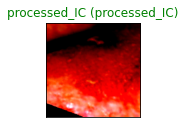

In [37]:
## Here we are ploting the images with it's predeicted labels, Correct are in green and false are in Red. 

#Obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy

#Move model inputs to cuda, if GPU available
if use_cuda:
    images = images.cuda()
    
#Get sample outputs
output= AlexNet_model(images)

#Convert output probabilities to predicted class
_,preds_tensor = torch.max(output,1)
preds = np.squeeze(preds_tensor.numpy()) if not use_cuda else np.squeeze(preds_tensor.cpu().numpy())

#Plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(20,4))
for idx in np.arange(1):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images.cpu()[idx], (1,2,0)))
    ax.set_title("{} ({})".format(classes[preds[idx]],classes[labels[idx]]),
                color=("green" if preds[idx]==labels[idx].item() else "red"))

In [33]:
# conf_matrix = torch.zeros(5, 5)
# for t, p in zip(target, pred):
#     conf_matrix[t, p] += 1

# print('Confusion matrix\n', conf_matrix)

# TP = conf_matrix.diag()
# for c in range(5):
#     idx = torch.ones(5).byte()
#     idx[c] = 0
#     # all non-class samples classified as non-class
#     TN = conf_matrix[idx.nonzero()[:, None], idx.nonzero()].sum() #conf_matrix[idx[:, None], idx].sum() - conf_matrix[idx, c].sum()
#     # all non-class samples classified as class
#     FP = conf_matrix[idx, c].sum()
#     # all class samples not classified as class
#     FN = conf_matrix[c, idx].sum()
#     print('Class {}\nTP {}, TN {}, FP {}, FN {}'.format(c, TP[c], TN, FP, FN))

In [28]:
#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].cuda(), data[1].cuda()
        outputs = AlexNet_model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            
for i in range(5):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))  

Accuracy of processed_AK : 79 %
Accuracy of processed_BCC : 70 %
Accuracy of processed_IC : 84 %
Accuracy of processed_Melanoma : 82 %
Accuracy of processed_SCC : 60 %
